In [1]:
# Importing the libraries to use for the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
# Reading the data using pandas
DATA_PATH = 'data/'
train = pd.read_csv(DATA_PATH + 'train_data.csv')
test = pd.read_csv(DATA_PATH + 'test_data.csv')


In [3]:
# Viewing the data
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [4]:
# To view all the data columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [5]:
# To view the columns and the rows of both train and test data
print(train.shape)
print(test.shape)

(7160, 14)
(3069, 13)


In [6]:
train.isnull().sum() # Check for missing values

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [7]:
train.describe() # Descriptive statistics for train data

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [8]:
train.Garden.unique()

array(['V', 'O', nan], dtype=object)

In [9]:
train.Garden.value_counts()

O    3602
V    3551
Name: Garden, dtype: int64

In [10]:
train['YearOfObservation'].value_counts()

2012    1858
2013    1811
2014    1373
2015    1075
2016    1043
Name: YearOfObservation, dtype: int64

<Axes: >

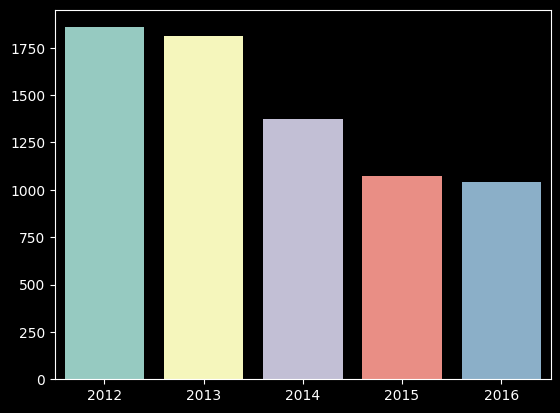

In [11]:
# bar chart showing the frequency of each observation year
sns.barplot(x=train['YearOfObservation'].value_counts().index,y=train['YearOfObservation'].value_counts().values)

In [12]:
# Viewing how many values are in insured oeriod
train.Insured_Period.value_counts()

1.000000    5325
0.997268     547
0.000000     165
0.747945      60
0.495890      49
            ... 
0.435616       1
0.308743       1
0.437158       1
0.578082       1
0.030137       1
Name: Insured_Period, Length: 401, dtype: int64

In [13]:
train.Residential.value_counts()

0    4973
1    2187
Name: Residential, dtype: int64

In [14]:
train.Building_Painted.value_counts()

V    5382
N    1778
Name: Building_Painted, dtype: int64

In [15]:
train.Building_Fenced.value_counts()

N    3608
V    3552
Name: Building_Fenced, dtype: int64

In [16]:
train.Settlement.value_counts()

R    3610
U    3550
Name: Settlement, dtype: int64

In [17]:
train['Building Dimension'].value_counts()

400.0     150
500.0     120
300.0     118
450.0     117
600.0     114
         ... 
1046.0      1
763.0       1
5464.0      1
843.0       1
1067.0      1
Name: Building Dimension, Length: 2043, dtype: int64

In [18]:
train.Building_Type.value_counts()

2    3305
1    1716
3    1230
4     909
Name: Building_Type, dtype: int64

In [19]:
train.Date_of_Occupancy.value_counts()

1960.0    1818
1980.0    1155
1988.0     530
1900.0     371
1970.0     285
          ... 
1931.0       1
1824.0       1
1914.0       1
1846.0       1
1929.0       1
Name: Date_of_Occupancy, Length: 134, dtype: int64

In [20]:
train.NumberOfWindows.value_counts().index

Index(['   .', '4', '3', '5', '2', '6', '7', '8', '1', '>=10', '9'], dtype='object')

In [21]:
train.Geo_Code.value_counts()

6088     143
33063    137
6083     113
13206     98
31555     87
        ... 
59650      1
59656      1
60057      1
60172      1
2B353      1
Name: Geo_Code, Length: 1307, dtype: int64

In [22]:
train.Claim.value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

## Model 1

> This model uses Logistic regression to create a machine learning model and predict outcome

In [23]:
# Split the data into Feature and target sets
X = train.drop(['Claim'],axis = 1)
y = train['Claim']

In [24]:
X.drop(['Customer Id'],axis=1, inplace=True)

In [25]:
y.shape, X.shape

((7160,), (7160, 12))

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size= 0.9, random_state= 42 )

In [47]:
from catboost import CatBoostClassifier

In [48]:
# Instatiate the model
cb = CatBoostClassifier()
lr = LogisticRegression()
ss = StandardScaler()
oe = OrdinalEncoder()
si = SimpleImputer(strategy = 'most_frequent')
ohe = OneHotEncoder()
xgb = XGBClassifier()

In [49]:
pipe = make_pipeline(
    make_column_transformer(
        (ohe, ['Building_Painted','Building_Fenced','Garden','Settlement']),
        (ss,['Building Dimension', 'Date_of_Occupancy'])
    ),
    si, 
    cb
)

In [50]:
pipe.fit(X_train, y_train)

Learning rate set to 0.022827
0:	learn: 0.6832588	total: 152ms	remaining: 2m 31s
1:	learn: 0.6732421	total: 158ms	remaining: 1m 18s
2:	learn: 0.6640933	total: 162ms	remaining: 53.9s
3:	learn: 0.6555574	total: 166ms	remaining: 41.3s
4:	learn: 0.6480144	total: 168ms	remaining: 33.4s
5:	learn: 0.6404039	total: 171ms	remaining: 28.3s
6:	learn: 0.6328719	total: 174ms	remaining: 24.7s
7:	learn: 0.6253662	total: 177ms	remaining: 21.9s
8:	learn: 0.6191063	total: 179ms	remaining: 19.7s
9:	learn: 0.6131169	total: 181ms	remaining: 17.9s
10:	learn: 0.6070905	total: 184ms	remaining: 16.5s
11:	learn: 0.6013178	total: 187ms	remaining: 15.4s
12:	learn: 0.5955876	total: 191ms	remaining: 14.5s
13:	learn: 0.5902950	total: 194ms	remaining: 13.7s
14:	learn: 0.5851608	total: 198ms	remaining: 13s
15:	learn: 0.5801484	total: 201ms	remaining: 12.3s
16:	learn: 0.5754004	total: 204ms	remaining: 11.8s
17:	learn: 0.5709903	total: 208ms	remaining: 11.3s
18:	learn: 0.5668444	total: 211ms	remaining: 10.9s
19:	learn: 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Building_Painted',
                                                   'Building_Fenced', 'Garden',
                                                   'Settlement']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Building Dimension',
                                                   'Date_of_Occupancy'])])),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x000001D9079B6980>)])

In [51]:
pred_1 = pipe.predict(X_test)

## Model 2

> In machine learning, imbalanced data refers to a situation where one class in the target variable has significantly fewer instances than another class. This can cause problems during the training of a model because the algorithm may become biased towards the majority class, leading to poor performance in predicting the minority class.

> To address this issue, one approach is to create a balanced dataset. In this case, oversampling is used, which involves creating additional instances of the minority class to balance the number of instances in both classes. Oversampling can be done using different techniques, and one such technique is the __Synthetic Minority Oversampling Technique (SMOTE)__.

> SMOTE generates synthetic samples of the minority class by interpolating between the existing minority class samples. The new samples are generated by selecting two or more minority class instances and then creating a new sample along the line segment that connects them in the feature space. This technique allows the algorithm to learn the characteristics of the minority class better and reduces the bias towards the majority class.

> After the oversampling is performed, the balanced dataset can be used to train a machine learning model that can predict the target variable accurately. Therefore, creating a balanced dataset is crucial for improving the performance of a model in cases where the data is imbalanced.







In [52]:
# Create a pipeline with the various models that would run in it.
transformer = make_pipeline(
    make_column_transformer(
        (ohe, ['Building_Painted','Building_Fenced','Garden','Settlement']),
        (ss,['Building Dimension', 'Date_of_Occupancy'])
    ),
    si
)

In [53]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(transformer.fit_transform(X), y.ravel())
 

In [54]:
X.shape, X_res.shape

((7160, 12), (11052, 11))

In [55]:
X_res = pd.DataFrame(X_res, columns=X.columns[:-1])

In [56]:
X_train_res,X_test_res,y_train_res,y_test_res = train_test_split(X_res,y_res, train_size= 0.9, random_state= 42 )

In [57]:
model = cb.fit(X_train_res, y_train_res)

Learning rate set to 0.027475
0:	learn: 0.6894809	total: 3.98ms	remaining: 3.98s
1:	learn: 0.6862926	total: 7.41ms	remaining: 3.7s
2:	learn: 0.6829995	total: 11.9ms	remaining: 3.96s
3:	learn: 0.6797121	total: 15.7ms	remaining: 3.91s
4:	learn: 0.6765718	total: 19.4ms	remaining: 3.87s
5:	learn: 0.6737988	total: 24.1ms	remaining: 4s
6:	learn: 0.6712085	total: 28.5ms	remaining: 4.04s
7:	learn: 0.6685629	total: 32.3ms	remaining: 4.01s
8:	learn: 0.6661000	total: 36ms	remaining: 3.96s
9:	learn: 0.6640506	total: 39.9ms	remaining: 3.95s
10:	learn: 0.6620479	total: 44.2ms	remaining: 3.97s
11:	learn: 0.6599521	total: 47.9ms	remaining: 3.94s
12:	learn: 0.6578757	total: 51.4ms	remaining: 3.9s
13:	learn: 0.6561783	total: 55ms	remaining: 3.87s
14:	learn: 0.6546313	total: 57.4ms	remaining: 3.77s
15:	learn: 0.6529332	total: 61.6ms	remaining: 3.79s
16:	learn: 0.6515347	total: 64.4ms	remaining: 3.73s
17:	learn: 0.6499575	total: 68.1ms	remaining: 3.72s
18:	learn: 0.6486714	total: 71.7ms	remaining: 3.7s
19

In [59]:
pred_2 = pd.Series(cb.predict(X_test_res))

In [60]:
pred_2

0       0
1       1
2       0
3       0
4       1
       ..
1101    1
1102    0
1103    0
1104    0
1105    1
Length: 1106, dtype: int64

## Model Evaluation

In [39]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, auc, roc_curve, f1_score

In [61]:
a1 = accuracy_score(pred_1,y_test)
a2 = accuracy_score(pred_2,y_test_res)

print('Accuracy score')
print(f'Original data: {a1} \nOversample data: {a2}')

Accuracy score
Original data: 0.7667597765363129 
Oversample data: 0.7043399638336347


In [62]:
p1 = precision_score(pred_1,y_test, pos_label=1)
p2 = precision_score(pred_2,y_test_res, pos_label=1)

print('Precision score')
print(f'Original data: {p1} \nOversample data: {p2}')

Precision score
Original data: 0.1437125748502994 
Oversample data: 0.656934306569343


In [63]:
r1 = recall_score(pred_1,y_test)
r2 = recall_score(pred_2,y_test_res)

print('recall score')
print(f'Original data: {r1} \nOversample data: {r2}')

recall score
Original data: 0.5 
Oversample data: 0.7214428857715431


In [64]:
f1 = f1_score(pred_1,y_test)
f2 = f1_score(pred_2,y_test_res)


print('f1 score')
print(f'Original data: {f1} \nOversample data: {f2}')

f1 score
Original data: 0.22325581395348837 
Oversample data: 0.6876790830945558


In [65]:
fpr, tpr, thresholds = roc_curve(pred_1, y_test)
auc1 = auc(fpr, tpr)
fpr, tpr, thresholds = roc_curve(pred_2,y_test_res)
auc2 = auc(fpr, tpr)

print('Area Under the Curev (AUC) score')
print(f'Original data: {auc1} \nOversample data: {auc2}')

Area Under the Curev (AUC) score
Original data: 0.6429640718562875 
Oversample data: 0.7058614758347007


## Conclussion

>The code provided compares the performance of two machine learning models using various metrics. The metrics used are accuracy score, precision score, recall score, F1 score, and area under the curve (AUC) score.

> The ___accuracy score__ measures the proportion of correctly predicted instances to the total number of instances in the test set. In this case, the first model's accuracy score, trained on the original data, is compared to the second model's accuracy score, which was trained on oversampled data. The second model's accuracy score is higher than the first, indicating that oversampling has improved the model's ability to accurately predict outcomes.

> The __precision score__ measures the proportion of correctly predicted positive instances to the total number of predicted positive instances. The second model's precision score is higher than the first, indicating that it is better at correctly predicting positive instances.

> The __recall score__ measures the proportion of correctly predicted positive instances to the total number of actual positive instances. The second model's recall score is higher than the first, indicating that it is better at correctly identifying positive instances.

> The __F1 score__ is the harmonic mean of precision and recall, which provides a balance between the two. The second model's F1 score is higher than the first, indicating that it achieves a better balance between precision and recall.

> Finally, the __AUC score__ measures the model's ability to distinguish between positive and negative instances based on the predicted probabilities. The second model's AUC score is higher than the first, indicating that it is better at distinguishing between positive and negative instances.

> In summary, the second model trained on oversampled data outperforms the first model trained on the original data on all metrics, indicating that oversampling has improved the model's ability to predict outcomes.

In [68]:
pred_test = pd.Series(cb.predict(pipe.fit(X_test_res, y_test_res)))

Learning rate set to 0.010755
0:	learn: 0.6919028	total: 2.1ms	remaining: 2.1s
1:	learn: 0.6905037	total: 4.17ms	remaining: 2.08s
2:	learn: 0.6892021	total: 6.25ms	remaining: 2.08s
3:	learn: 0.6881290	total: 7.99ms	remaining: 1.99s
4:	learn: 0.6869487	total: 9.86ms	remaining: 1.96s
5:	learn: 0.6857106	total: 12.1ms	remaining: 2s
6:	learn: 0.6845973	total: 14.1ms	remaining: 2s
7:	learn: 0.6834691	total: 15.7ms	remaining: 1.94s
8:	learn: 0.6825107	total: 17.6ms	remaining: 1.94s
9:	learn: 0.6813076	total: 19.8ms	remaining: 1.96s
10:	learn: 0.6804365	total: 21.7ms	remaining: 1.95s
11:	learn: 0.6795999	total: 23.2ms	remaining: 1.91s
12:	learn: 0.6786660	total: 24.6ms	remaining: 1.87s
13:	learn: 0.6778266	total: 25.8ms	remaining: 1.81s
14:	learn: 0.6767671	total: 27.6ms	remaining: 1.81s
15:	learn: 0.6759037	total: 29.3ms	remaining: 1.8s
16:	learn: 0.6752745	total: 30.4ms	remaining: 1.76s
17:	learn: 0.6743216	total: 32ms	remaining: 1.75s
18:	learn: 0.6735651	total: 33.3ms	remaining: 1.72s
19:

CatBoostError: Invalid data type=<class 'sklearn.pipeline.Pipeline'> : must be list, numpy.ndarray, pandas.Series, pandas.DataFrame, scipy.sparse matrix, catboost.FeaturesData or catboost.Pool

In [ ]:
pred_test

In [ ]:
submissions = pd.DataFrame({'Customer Id': test['Customer Id'], 'Claim': pred_test.values})

In [ ]:
submissions.to_csv('my_submission.csv',index=False)